- Simple Linear regression $\longrightarrow\;y\;=\;\beta_{0}\;+\;\beta_1 x$


- Multiple Linear Regression $\longrightarrow\;y\;=\;\beta_{0}\;+\;\beta_1 x_1\;+\;\beta_2 x_2\;+\;\beta_3 x_3\;+....\;+\;\beta_n x_n$


- Simple Polynomial Regression for degree = 2  $\longrightarrow\;y\;=\;\beta_{0}\;+\;\beta_1 x\;+\;\beta_2 x^2$


For lower degree (degree = 2) Polynomial Regression tries to underfit and for higher degree(degree = 15) it tries to Overfit.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, SGDRegressor

from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score

from sklearn.pipeline import Pipeline

In [69]:
# generating data
# 1 input column and 1 output column

X = 6* np.random.rand(200, 1) - 3
y = 0.8 * X**2 + 0.9 * X + 2 + np.random.randn(200,1)

# equation inside the data y = 0.8^2 + 0.9^x + 2 polynomial of degree 2

In [70]:
X

array([[-1.1014095 ],
       [ 2.93780596],
       [-2.99636788],
       [-1.60961739],
       [-2.42062548],
       [ 2.46987766],
       [ 2.78053173],
       [ 2.98825682],
       [-2.7470745 ],
       [-0.98671446],
       [-1.12826327],
       [ 2.62680009],
       [-0.18952924],
       [ 2.17197166],
       [-0.88036448],
       [ 1.48293523],
       [ 0.63513102],
       [ 1.60980902],
       [-1.22940832],
       [-1.55357696],
       [-2.0681582 ],
       [ 0.77104979],
       [ 2.47870937],
       [ 1.32122348],
       [-0.50079119],
       [-2.83301405],
       [-2.8257838 ],
       [-2.15135354],
       [ 2.87957989],
       [ 0.23591255],
       [-1.16320369],
       [ 2.13739513],
       [ 2.16750822],
       [-0.78431983],
       [-2.75676497],
       [-2.38925047],
       [-0.19529652],
       [-2.07487599],
       [-0.40932145],
       [ 0.5136825 ],
       [ 0.11703744],
       [-0.11503779],
       [-1.80400859],
       [-2.79302665],
       [-1.14570343],
       [-2

In [71]:
y

array([[ 1.24825496],
       [ 9.44596541],
       [ 6.66580402],
       [ 1.85560703],
       [ 4.27158901],
       [ 8.25832632],
       [10.1685941 ],
       [10.11910195],
       [ 5.25346857],
       [ 1.93203193],
       [ 2.23406639],
       [ 8.08948881],
       [ 2.28762016],
       [ 7.78604759],
       [ 1.42082838],
       [ 6.34068099],
       [ 1.23752096],
       [ 5.51864282],
       [ 3.03434593],
       [ 2.00870493],
       [ 3.52771574],
       [ 2.70403402],
       [10.27864871],
       [ 5.89523505],
       [ 2.8256671 ],
       [ 5.53756426],
       [ 5.85834362],
       [ 4.47518102],
       [11.1458679 ],
       [ 1.00592846],
       [ 1.72369607],
       [ 9.26017012],
       [ 9.15831971],
       [ 2.26219917],
       [ 5.18147642],
       [ 4.8274434 ],
       [ 2.94296748],
       [ 4.14013728],
       [ 1.52262306],
       [ 2.12140663],
       [ 2.13631702],
       [ 0.28048915],
       [ 3.42858138],
       [ 5.67236401],
       [ 2.08852917],
       [ 4

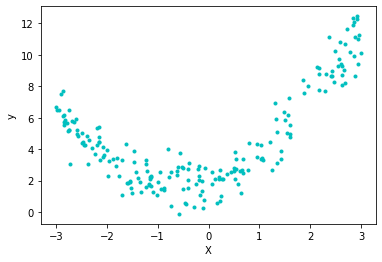

In [72]:
plt.plot(X,y,'c.')
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Using normal Linear Regression first

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [74]:
lr = LinearRegression()

In [75]:
lr.fit(X_train,y_train)

LinearRegression()

In [76]:
y_pred = lr.predict(X_test)
r2_score(y_test,y_pred)

0.25224379309307365

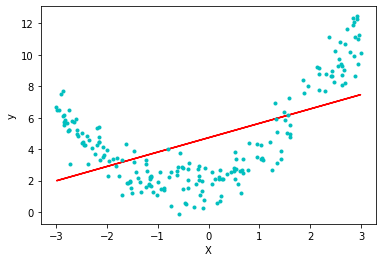

In [77]:
plt.plot(X_train,lr.predict(X_train),color = 'r')
plt.plot(X, y, "c.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Now applying Polynomial Regression

In [78]:
# degree = 2
poly = PolynomialFeatures(degree=2) 

# if include_bias=False then we will only get 2 terms from degree2,will not get bias term

In [79]:
X_train_transform = poly.fit_transform(X_train)
X_test_transform = poly.transform(X_test)

In [80]:
X_train[0]

array([1.34792133])

In [81]:
X_train_transform[0]

array([1.        , 1.34792133, 1.81689192])

so for each value of X_train, X_train_transform has 3 values (degree=2) [x^0, x^1, x^2 ]

#### NOTE: Polynomial features are only applied on Input/independent variables not on y_test or y_train

In [82]:
lr = LinearRegression()

In [83]:
lr.fit(X_train_transform,y_train)

LinearRegression()

In [84]:
y_pred = lr.predict(X_test_transform)

In [85]:
r2_score(y_test, y_pred)

0.9090611081843711

In [86]:
lr.coef_

# x^0 coef = 0
# x^1 coef = 0.89
# x^2 coef = 0.78

array([[0.        , 0.85199951, 0.79327308]])

In [87]:
lr.intercept_

array([2.09101667])

In [88]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

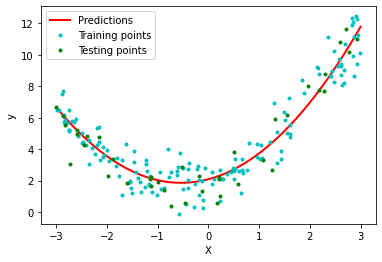

In [89]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "c.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

##### for degree of your choice

In [90]:
def polynomial_regression(degree):
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    plt.plot(X_train, y_train, "c.", linewidth=3)
    plt.plot(X_test, y_test, "b.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

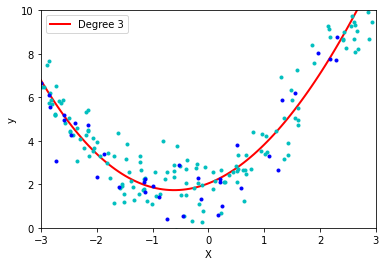

In [91]:
# with degree = 3
polynomial_regression(3)

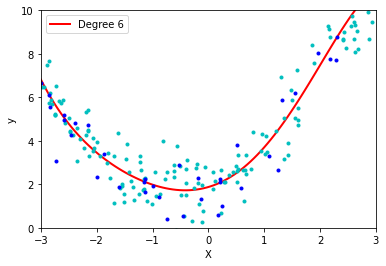

In [92]:
# with degree = 4
polynomial_regression(6)

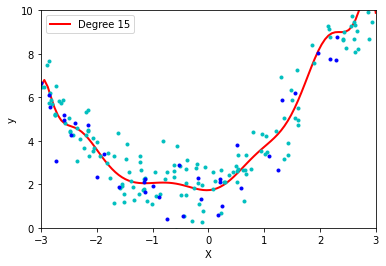

In [93]:
# overfitting
polynomial_regression(15)

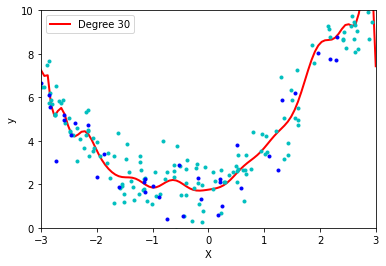

In [94]:
# overfitting
polynomial_regression(30)

# blue are train data

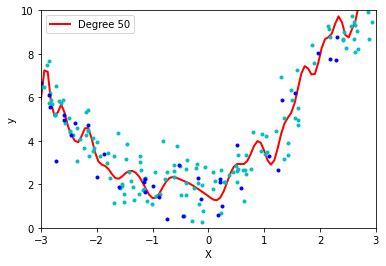

In [95]:
# overfitting
polynomial_regression(50)

# blue are train data

### Multiple Polynomial Regression

In [96]:
# 3D polynomial regression
# 2 input columns and 1 output column

x = 7 * np.random.rand(100, 1) - 2.8 # input column 1
y = 7 * np.random.rand(100, 1) - 2.8 # input column 2


# z is output column
z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

# plynomial equation (degree = 2) z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

In [97]:
# plotting the data
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())
fig.show()

In [98]:
# first applying Simple Linear Regression on the data

lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

z_final = lr.predict(final).reshape(10,10)


In [99]:
# output of linear regression

import plotly.graph_objects as go

fig = px.scatter_3d(df, x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

In [100]:
# now applying multiple polynomial regression on the data
# starting with degree = 2

X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [101]:
poly = PolynomialFeatures(degree=2)
X_multi_trans = poly.fit_transform(X_multi)

In [102]:
print("Numer of Input features",poly.n_input_features_)
print("Numer of Ouput features",poly.n_output_features_)
print("Powers\n",poly.powers_)

Numer of Input features 2
Numer of Ouput features 6
Powers
 [[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]


C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning:

The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.



x = 2 and y =2 is not there as then degree of polynomial will become 4.

In [103]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)

In [104]:
print("Numer of Input features",poly.n_input_features_)
print("Numer of Ouput features",poly.n_output_features_)
print("Powers\n",poly.powers_)

Numer of Input features 2
Numer of Ouput features 496
Powers
 [[ 0  0]
 [ 1  0]
 [ 0  1]
 [ 2  0]
 [ 1  1]
 [ 0  2]
 [ 3  0]
 [ 2  1]
 [ 1  2]
 [ 0  3]
 [ 4  0]
 [ 3  1]
 [ 2  2]
 [ 1  3]
 [ 0  4]
 [ 5  0]
 [ 4  1]
 [ 3  2]
 [ 2  3]
 [ 1  4]
 [ 0  5]
 [ 6  0]
 [ 5  1]
 [ 4  2]
 [ 3  3]
 [ 2  4]
 [ 1  5]
 [ 0  6]
 [ 7  0]
 [ 6  1]
 [ 5  2]
 [ 4  3]
 [ 3  4]
 [ 2  5]
 [ 1  6]
 [ 0  7]
 [ 8  0]
 [ 7  1]
 [ 6  2]
 [ 5  3]
 [ 4  4]
 [ 3  5]
 [ 2  6]
 [ 1  7]
 [ 0  8]
 [ 9  0]
 [ 8  1]
 [ 7  2]
 [ 6  3]
 [ 5  4]
 [ 4  5]
 [ 3  6]
 [ 2  7]
 [ 1  8]
 [ 0  9]
 [10  0]
 [ 9  1]
 [ 8  2]
 [ 7  3]
 [ 6  4]
 [ 5  5]
 [ 4  6]
 [ 3  7]
 [ 2  8]
 [ 1  9]
 [ 0 10]
 [11  0]
 [10  1]
 [ 9  2]
 [ 8  3]
 [ 7  4]
 [ 6  5]
 [ 5  6]
 [ 4  7]
 [ 3  8]
 [ 2  9]
 [ 1 10]
 [ 0 11]
 [12  0]
 [11  1]
 [10  2]
 [ 9  3]
 [ 8  4]
 [ 7  5]
 [ 6  6]
 [ 5  7]
 [ 4  8]
 [ 3  9]
 [ 2 10]
 [ 1 11]
 [ 0 12]
 [13  0]
 [12  1]
 [11  2]
 [10  3]
 [ 9  4]
 [ 8  5]
 [ 7  6]
 [ 6  7]
 [ 5  8]
 [ 4  9]
 [ 3 10]
 [ 2 11]
 [ 1 12]
 [

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning:

The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.



In [105]:
X_multi_trans.shape

(100, 496)

In [106]:
lr = LinearRegression()
lr.fit(X_multi_trans,z)

LinearRegression()

In [107]:
X_test_multi = poly.transform(final)

In [108]:
z_final = lr.predict(X_multi_trans).reshape(10,10)

In [109]:
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()